In [1]:
from tensorflow import keras
from keras import layers
from keras.datasets import mnist

In [2]:
# # Import mnist data
# (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# train_images = train_images.reshape((60000, 28, 28, 1))
# train_images = train_images.astype('float32')/255

# test_images = test_images.reshape((10000, 28, 28, 1))
# test_images = test_images.astype('float32')/255

# print(f'Train images shape: {train_images.shape}')
# print(f'Test images shape: {test_images.shape}')

In [3]:
# # Create the model
# inputs = keras.Input(shape=(28,28,1))
# x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
# x = layers.MaxPooling2D(pool_size=2)(x)
# x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
# x = layers.MaxPooling2D(pool_size=2)(x)
# x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
# x = layers.Flatten()(x)
# outputs = layers.Dense(10, activation='softmax')(x)
# model = keras.Model(inputs=inputs, outputs=outputs)

# model.summary()

In [4]:
# model.compile(optimizer='rmsprop',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# model.fit(train_images, train_labels, epochs=5, batch_size=64)

In [5]:
# test_loss, test_acc = model.evaluate(test_images, test_labels)
# print(f'Test Accuracy: {test_acc}')

# Cats and Dogs
---

In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lennykiruthu","key":"bffd60b92f708ce59c7dab8b6e152744"}'}

In [7]:
!mkdir ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 57% 124M/218M [00:00<00:00, 1.30GB/s]
100% 218M/218M [00:00<00:00, 908MB/s] 


In [9]:
!unzip cat-and-dog.zip -d cat_and_dog

Streaming output truncated to the last 5000 lines.
  inflating: cat_and_dog/training_set/training_set/cats/cat.3704.jpg  
  inflating: cat_and_dog/training_set/training_set/cats/cat.3705.jpg  
  inflating: cat_and_dog/training_set/training_set/cats/cat.3706.jpg  
  inflating: cat_and_dog/training_set/training_set/cats/cat.3707.jpg  
  inflating: cat_and_dog/training_set/training_set/cats/cat.3708.jpg  
  inflating: cat_and_dog/training_set/training_set/cats/cat.3709.jpg  
  inflating: cat_and_dog/training_set/training_set/cats/cat.371.jpg  
  inflating: cat_and_dog/training_set/training_set/cats/cat.3710.jpg  
  inflating: cat_and_dog/training_set/training_set/cats/cat.3711.jpg  
  inflating: cat_and_dog/training_set/training_set/cats/cat.3712.jpg  
  inflating: cat_and_dog/training_set/training_set/cats/cat.3713.jpg  
  inflating: cat_and_dog/training_set/training_set/cats/cat.3714.jpg  
  inflating: cat_and_dog/training_set/training_set/cats/cat.3715.jpg  
  inflating: cat_and_dog/tr

In [10]:
import  os, shutil, pathlib

In [11]:
original_dir  = pathlib.Path('/content/cat_and_dog/training_set/training_set')
new_base_path = pathlib.Path('/content/cat_and_dog_small')

In [12]:
def make_subset(subset_name, start_index, end_index):
  for category in ('cats', 'dogs'):
    dir = new_base_path / subset_name / category
    os.makedirs(dir)

    fnames = [f'{category[:-1]}.{i}.jpg' for i in range(start_index, end_index)]

    for fname in fnames:
      shutil.copyfile(src=original_dir/category/fname,
                      dst=dir/fname)

make_subset('train', start_index=1000, end_index=2000)
make_subset('validation', start_index=2000, end_index=2500)
make_subset('test', start_index=2500, end_index=3000)

In [13]:
from PIL import Image
import matplotlib.pyplot as plt

Image 1: dog.1062.jpg
 - Format: JPEG
 - Size (width x height): (336, 447)
 - Mode: RGB
----------------------------------------


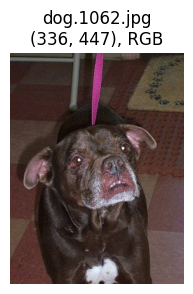

Image 2: dog.1063.jpg
 - Format: JPEG
 - Size (width x height): (349, 290)
 - Mode: RGB
----------------------------------------


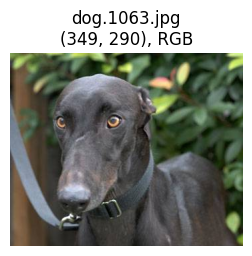

Image 3: dog.1256.jpg
 - Format: JPEG
 - Size (width x height): (319, 398)
 - Mode: RGB
----------------------------------------


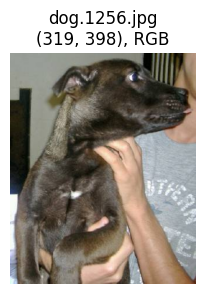

Image 4: dog.1346.jpg
 - Format: JPEG
 - Size (width x height): (207, 259)
 - Mode: RGB
----------------------------------------


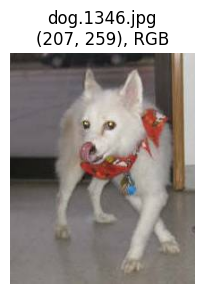

Image 5: dog.1421.jpg
 - Format: JPEG
 - Size (width x height): (500, 374)
 - Mode: RGB
----------------------------------------


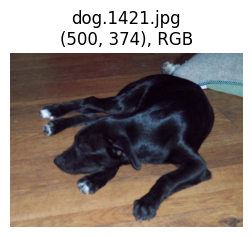

Image 6: dog.1510.jpg
 - Format: JPEG
 - Size (width x height): (231, 287)
 - Mode: RGB
----------------------------------------


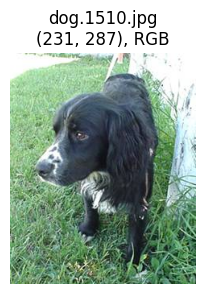

Image 7: dog.1631.jpg
 - Format: JPEG
 - Size (width x height): (310, 231)
 - Mode: RGB
----------------------------------------


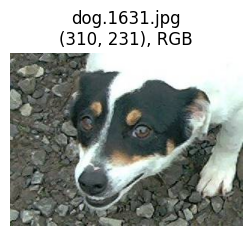

Image 8: dog.1637.jpg
 - Format: JPEG
 - Size (width x height): (347, 499)
 - Mode: RGB
----------------------------------------


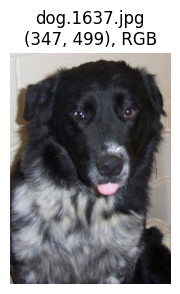

Image 9: dog.1642.jpg
 - Format: JPEG
 - Size (width x height): (499, 374)
 - Mode: RGB
----------------------------------------


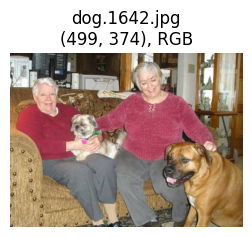

Image 10: dog.1773.jpg
 - Format: JPEG
 - Size (width x height): (267, 326)
 - Mode: RGB
----------------------------------------


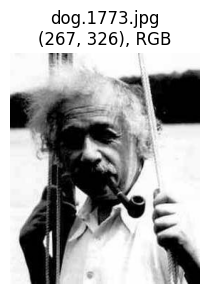

In [14]:
folder_path = '/content/cat_and_dog_small/train/dogs'

image_files = sorted(os.listdir(folder_path)[:10])

for i, filename in enumerate(image_files):
  img_path = os.path.join(folder_path, filename)

  try:
      with Image.open(img_path) as img:
        # Print image properties
        print(f"Image {i+1}: {filename}")
        print(f" - Format: {img.format}")
        print(f" - Size (width x height): {img.size}")
        print(f" - Mode: {img.mode}")
        print("-" * 40)

        # Show the image
        plt.figure(figsize=(3,3))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{filename}\n{img.size}, {img.mode}")
        plt.show()

  except Exception as e:
    print(f"Could not open {filename}: {e}")

In [15]:
inputs  = keras.Input(shape=(180,180,3))
x       = layers.Rescaling(1./255)(inputs)
x       = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x       = layers.MaxPooling2D(pool_size=2)(x)
x       = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x       = layers.MaxPooling2D(pool_size=2)(x)
x       = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x       = layers.MaxPooling2D(pool_size=2)(x)
x       = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x       = layers.MaxPooling2D(pool_size=2)(x)
x       = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x       = layers.MaxPooling2D(pool_size=2)(x)
x       = layers.Flatten()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model   = keras.Model(inputs=inputs, outputs=outputs)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         2,305 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 980,801 (3.74 MB)

 Trainable params: 980,801 (3.74 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory('/content/cat_and_dog_small/train',
                                             image_size=(180, 180),
                                             batch_size=32)

test_dataset = image_dataset_from_directory('/content/cat_and_dog_small/test',
                                             image_size=(180, 180),
                                             batch_size=32)

val_dataset = image_dataset_from_directory('/content/cat_and_dog_small/validation',
                                             image_size=(180, 180),
                                             batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [18]:
for data_batch, label_batch in train_dataset:
  print('Data batch shape:', data_batch.shape)
  print('Data label shape:', label_batch.shape)
  break

Data batch shape: (32, 180, 180, 3)
Data label shape: (32,)


In [19]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='convet_from_scratch.keras',
        save_best_only=True,
        monitor='val_loss')
]

In [20]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=val_dataset,
    callbacks=callbacks
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 165ms/step - accuracy: 0.5178 - loss: 0.7253 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - accuracy: 0.5021 - loss: 0.6942 - val_accuracy: 0.5050 - val_loss: 0.6903
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.5434 - loss: 0.6913 - val_accuracy: 0.6240 - val_loss: 0.6676
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.5842 - loss: 0.6759 - val_accuracy: 0.6270 - val_loss: 0.6662
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.6165 - loss: 0.6559 - val_accuracy: 0.6300 - val_loss: 0.6517
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.6591 - loss: 0.6134 - val_accuracy: 0.6410 - val_loss: 0.6530
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.6893 - loss: 0.5931 - val_accuracy: 0.7170 - val_loss: 0.5719
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.7215 - loss: 0.5552 - val_accuracy: 0.7160 -

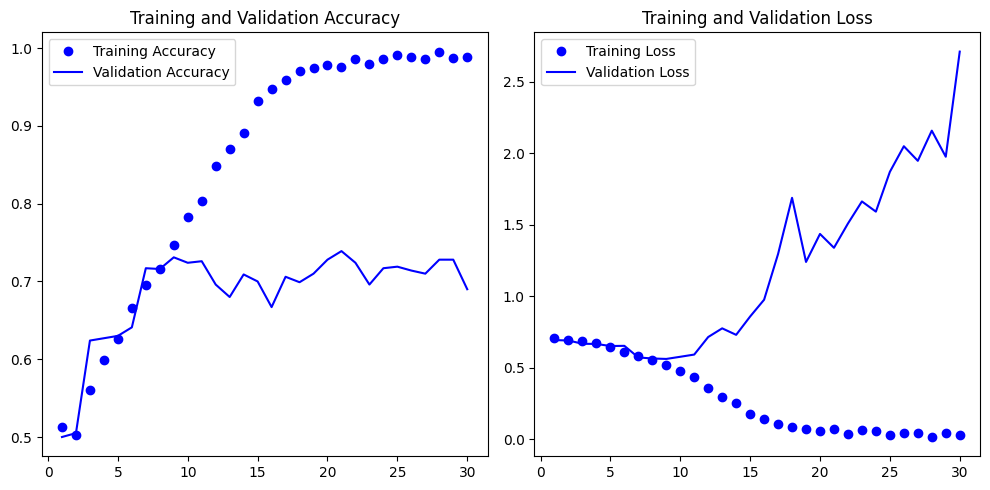

In [21]:
accuracy     = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss         = history.history['loss']
val_loss     = history.history['val_loss']
epochs       = range(1, len(accuracy)+1)

fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].plot(epochs, accuracy, 'bo', label='Training Accuracy')
axes[0].plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss, 'bo', label='Training Loss')
axes[1].plot(epochs, val_loss, 'b', label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

In [22]:
test_model = keras.models.load_model('/content/convet_from_scratch.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Test Accuracy: {test_acc:.3f}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.6824 - loss: 0.5864
Test Accuracy: 0.680
